


A base está desbalanceada e com outlier, escolhi não tratar agora e utilizar um modelo de treinamento que consiga lidar com eles.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("hcvdat0.csv")


In [ ]:
print(df.describe())

       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

In [ ]:
print(df.isna().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
print(df.isnull().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
df.dropna(axis = 0, inplace = True)

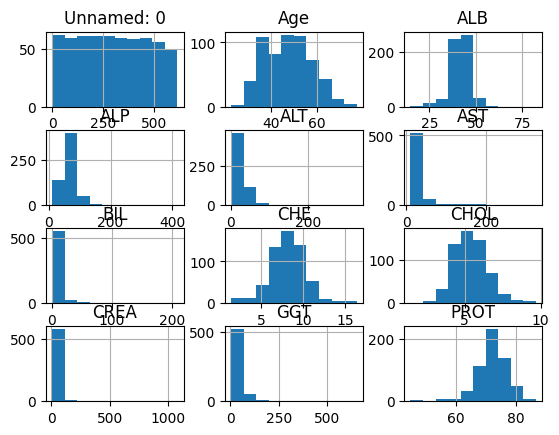

In [ ]:
df.hist()
plt.show()

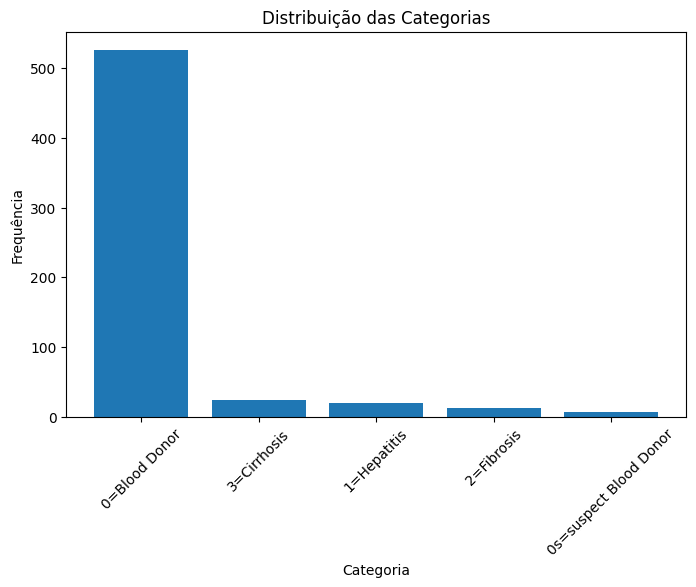

In [ ]:
import matplotlib.pyplot as plt

# Contagem das categorias
category_counts = df["Category"].value_counts()

# Plotando o gráfico de barras com os nomes das categorias
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values)
plt.title("Distribuição das Categorias")
plt.xlabel("Categoria")
plt.ylabel("Frequência")
plt.xticks(rotation=45)  # Rotaciona os nomes das categorias para melhor visualização
plt.show()



,0
Unnamed: 0,"Axes(0.125,0.712609;0.168478x0.167391)"
Age,"Axes(0.327174,0.712609;0.168478x0.167391)"
ALB,"Axes(0.529348,0.712609;0.168478x0.167391)"
ALP,"Axes(0.731522,0.712609;0.168478x0.167391)"
ALT,"Axes(0.125,0.511739;0.168478x0.167391)"
AST,"Axes(0.327174,0.511739;0.168478x0.167391)"
BIL,"Axes(0.529348,0.511739;0.168478x0.167391)"
CHE,"Axes(0.731522,0.511739;0.168478x0.167391)"
CHOL,"Axes(0.125,0.31087;0.168478x0.167391)"
CREA,"Axes(0.327174,0.31087;0.168478x0.167391)"


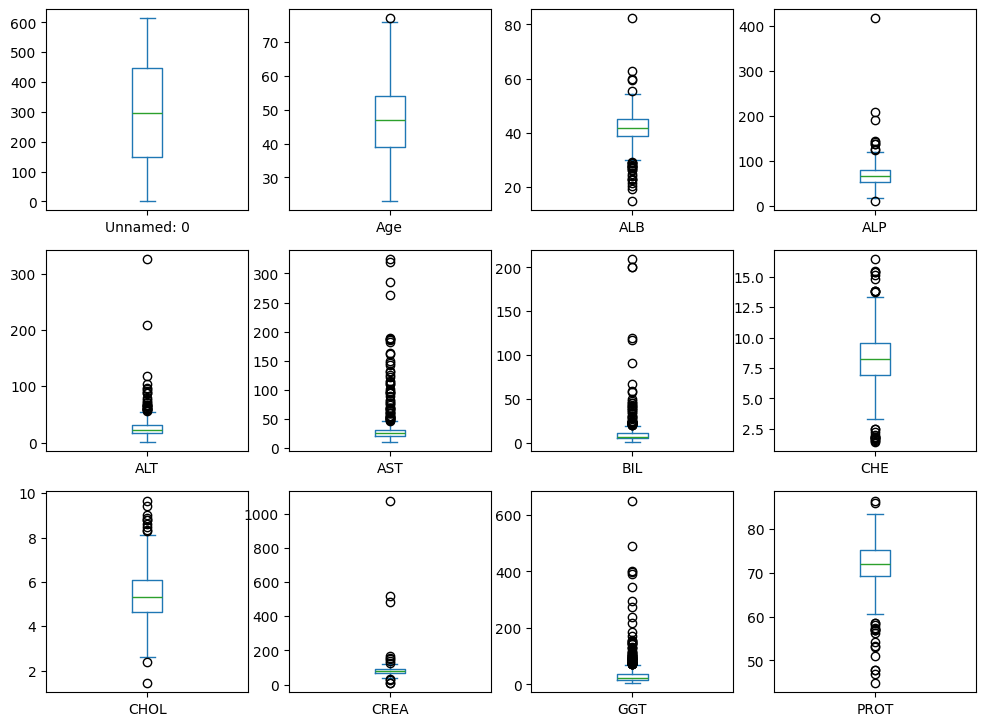

In [ ]:

from sklearn.preprocessing import LabelEncoder


df.plot(kind="box", subplots=True, layout=(4,4), figsize=(12,12))




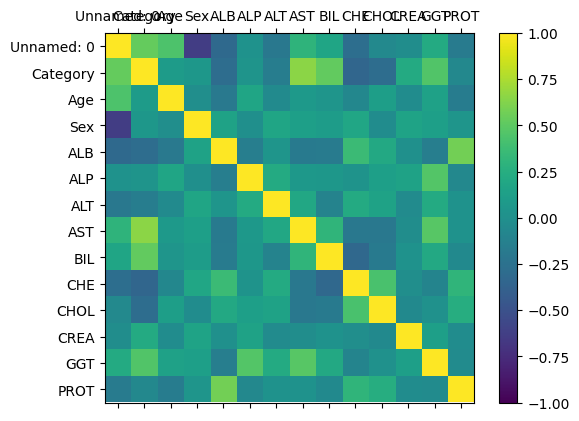

In [ ]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df["Sex"] = le.fit_transform(df["Sex"])

correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [ ]:
X = df.drop("Category", axis = 1)
y = df["Category"]

Colocando a rede, vou utilizar a arvore de decisão porque lida bem com bases desbalanceadas e com outliers


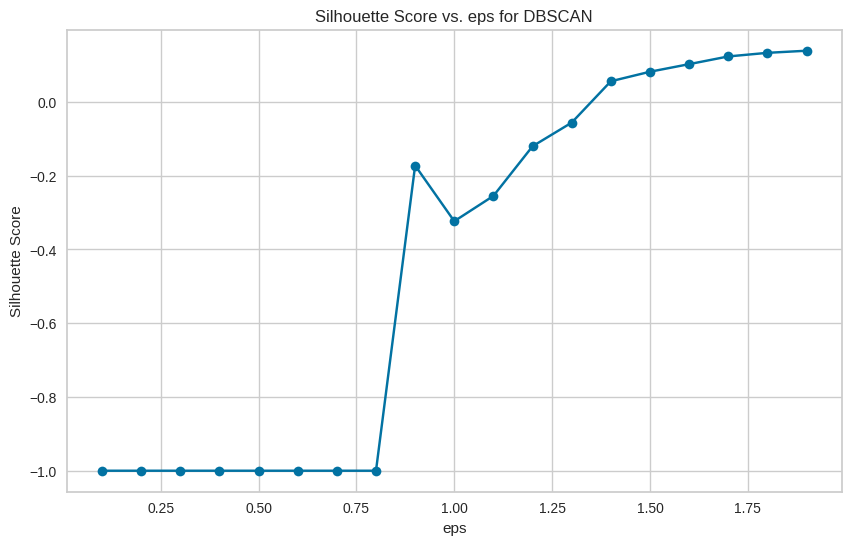

Optimal eps: 1.9000000000000001
Clusters identificados:
Cluster
 0    291
 1    203
-1     95
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Removendo colunas irrelevantes ou que não podem ser usadas como features
# Exemplo: 'Unnamed: 0'
df_cleaned = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Identificando variáveis independentes (X)
X = df_cleaned.drop(columns=['Category'], errors='ignore')

# Normalizando os dados para reduzir o impacto de outliers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of eps values to test
eps_values = np.arange(0.1, 2.0, 0.1)

# Store silhouette scores for each eps
silhouette_scores = []

# Iterate through eps values and calculate silhouette scores
for eps in eps_values:
    # Create and fit DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=5)  # Adjust min_samples as needed
    clusters = dbscan.fit_predict(X_scaled)

    # Calculate silhouette score if more than one cluster is found
    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Assign -1 if only one cluster is found

# Find the optimal eps value
optimal_eps = eps_values[np.argmax(silhouette_scores)]

# Plot silhouette scores vs. eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. eps for DBSCAN')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show()

print(f"Optimal eps: {optimal_eps}")

final_dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
final_clusters = final_dbscan.fit_predict(X_scaled)

# Adicionando os rótulos de cluster ao DataFrame
df_cleaned['Cluster'] = final_clusters
print("Clusters identificados:")
print(df_cleaned['Cluster'].value_counts())

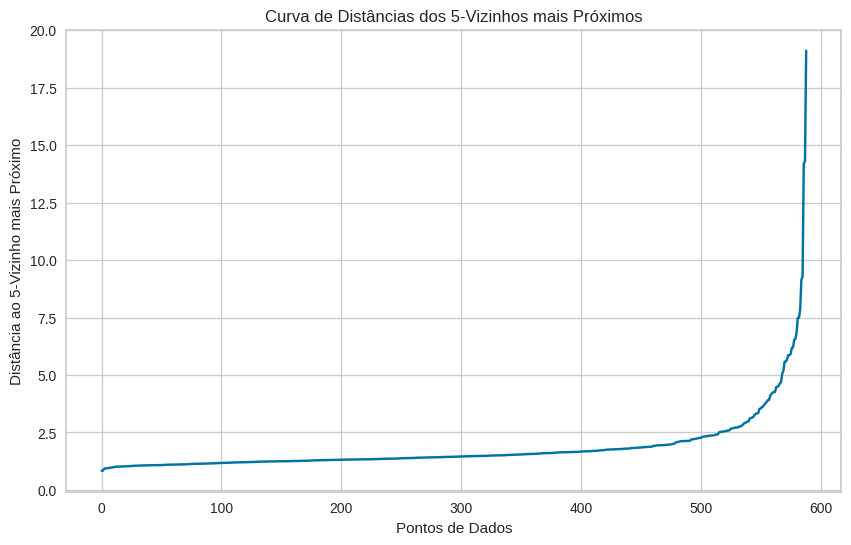

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Função para calcular a curva de distâncias k-vizinhos mais próximos
def plot_k_dist_curve(X, k=5):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Ordenar as distâncias em ordem crescente
    distances = np.sort(distances[:, k-1], axis=0)

    # Plotar a curva de distâncias
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'Curva de Distâncias dos {k}-Vizinhos mais Próximos')
    plt.xlabel('Pontos de Dados')
    plt.ylabel(f'Distância ao {k}-Vizinho mais Próximo')
    plt.show()

# Exemplo de uso
plot_k_dist_curve(X_scaled, k=5)


In [ ]:


# Get the number of clusters
n_clusters = len(set(final_clusters)) - (1 if -1 in final_clusters else 0)

print(f"Number of clusters: {n_clusters}")


Number of clusters: 2


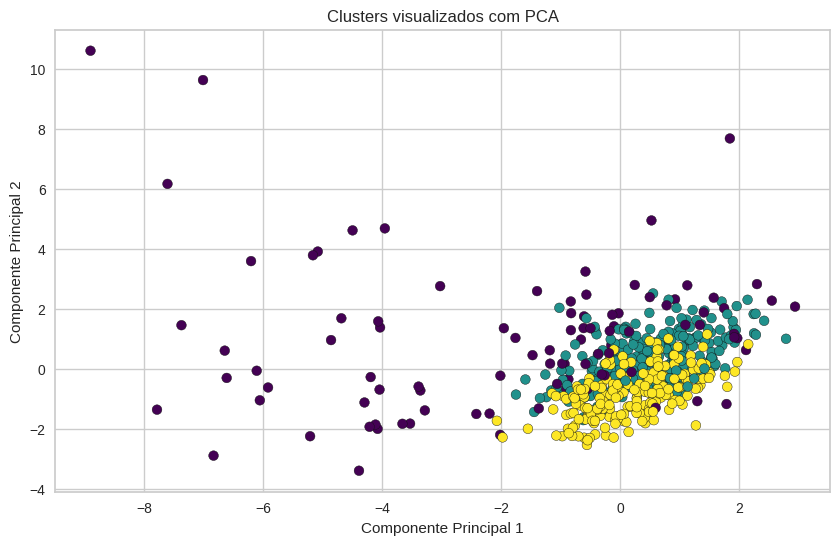

In [ ]:
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def calculate_lof_density(cluster_labels, X_scaled):
    lof = LocalOutlierFactor(n_neighbors=20)
    lof_scores = -lof.fit_predict(X_scaled)  # LOF scores negativos indicam alta densidade

    lof_densities = []
    unique_labels = set(cluster_labels)

    for label in unique_labels:
        if label == -1:
            continue  # Ignorar o ruído

        # Selecionar pontos do cluster
        cluster_points = X_scaled[cluster_labels == label]
        cluster_lof_scores = lof_scores[cluster_labels == label]

        # Calcular a densidade média local do cluster
        mean_lof = np.mean(cluster_lof_scores)
        lof_densities.append((label, mean_lof))

    return lof_densities

# Aplicar a função LOF aos clusters
lof_densities = calculate_lof_density(final_clusters, X_scaled)

# Exibir as densidades LOF dos clusters
for label, lof_density in lof_densities:
    print(f'Cluster {label}: Densidade LOF Média = {lof_density:.4f}')


Cluster 0: Densidade LOF Média = -1.0000
Cluster 1: Densidade LOF Média = -0.9901


Utilizando o Silhouette Score eu vi que havia 2 clusters e 1 outlier que ele não conseguiu classificar. Também encontrei o K utilizando o método do cotovelo.

Escolhi essa rede porque ela não é tão sensivel à outliers e desbalanceamento. A clusterização ajuda na visualização dos dois pontos baixos da base.
